In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv("AB_NYC_2019.csv")
print("Initial shape:", data.shape)
data.head()

Initial shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print("\nBasic Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

In [5]:
data = data.dropna(subset=['name', 'host_name'])

# Fill missing reviews_per_month with 0 (assume no reviews)
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

print("\nAfter handling missing values:")
print(data.isnull().sum())


After handling missing values:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
print("Duplicates before:", data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicates after:", data.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [8]:
# ------------------------------
# 6️⃣ Standardize Data
# ------------------------------

# Lowercase column names
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Strip whitespace from text columns
data['name'] = data['name'].str.strip()
data['host_name'] = data['host_name'].str.strip()

# ✅ Show a few rows to verify changes
print("\nColumn Names After Standardization:")
print(data.columns)

print("\nSample Cleaned Rows:")
print(data[['name', 'host_name']].head())



Column Names After Standardization:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Sample Cleaned Rows:
                                               name    host_name
0                Clean & quiet apt home by the park         John
1                             Skylit Midtown Castle     Jennifer
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth
3                   Cozy Entire Floor of Brownstone  LisaRoxanne
4  Entire Apt: Spacious Studio/Loft by central park        Laura


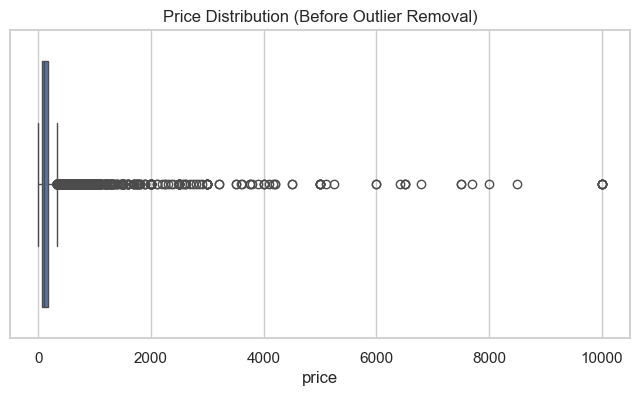

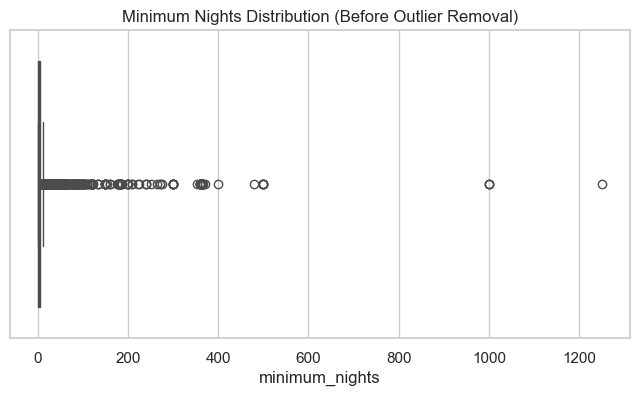

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['price'])
plt.title("Price Distribution (Before Outlier Removal)")
plt.show()

# Cap extreme prices (remove > 5000)
data = data[data['price'] <= 5000]

# Minimum nights distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=data['minimum_nights'])
plt.title("Minimum Nights Distribution (Before Outlier Removal)")
plt.show()

# Cap extreme minimum_nights (remove > 365)
data = data[data['minimum_nights'] <= 365]

In [10]:
data.to_csv("nyc_airbnb_cleaned.csv", index=False)
print("Cleaned dataset saved as nyc_airbnb_cleaned.csv")
print("Final shape:", data.shape)

Cleaned dataset saved as nyc_airbnb_cleaned.csv
Final shape: (48825, 16)


In [11]:
print("\nSummary of Cleaned Data:")
print(data.describe())


Summary of Cleaned Data:
                 id       host_id      latitude     longitude         price  \
count  4.882500e+04  4.882500e+04  48825.000000  48825.000000  48825.000000   
mean   1.902468e+07  6.764309e+07     40.728938    -73.952159    149.652657   
std    1.098204e+07  7.862433e+07      0.054535      0.046168    182.039838   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.476449e+06  7.824750e+06     40.690060    -73.983060     69.000000   
50%    1.969152e+07  3.080310e+07     40.723060    -73.955680    106.000000   
75%    2.915721e+07  1.074344e+08     40.763100    -73.936270    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990   5000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48825.000000       48825.000000       48825.000000   
mean         6.834388          23.286431           1.091655   
std         16.429331          44.561623           1.597438   
min       